In [1]:
import numpy as np
import rdkit as rd

In [2]:
! pip install chembl_webresource_client
! pip install seaborn
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
possible_targets = pd.DataFrame.from_dict(target_query)
possible_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


Lets choose the one concerning humans

In [4]:
target = possible_targets.target_chembl_id[0]
target

'CHEMBL220'

We will base the activity estimation on the IC50

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0
8830,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965330,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.18


Then lets do a bit of data cleaning

In [6]:
df_cleaned = df[df.standard_value.notna()]
df_cleaned = df_cleaned[df.canonical_smiles.notna()]
df_cleaned = df_cleaned.drop_duplicates(['canonical_smiles'])

df_cleaned



/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_57063/2338719627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963372,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216438,Binding affinity to AChE (unknown origin) asse...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,0.209
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0


Lets keep only the essential entries

In [7]:
df3 = df_cleaned[['molecule_chembl_id','canonical_smiles','standard_value']]
df3

has_nan = df3.isnull().values.any()
has_nan

False

Lets chose our descriptors, let begin with Lipinski descriptor and determine which one is active and which one is not 

In [8]:
from rdkit import Chem 
from rdkit.Chem import Descriptors, Lipinski


In [9]:
bioactivity = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity.append(0) #inactive
  elif float(i) <= 1000:
    bioactivity.append(2) #active
  else:
    bioactivity.append(1) #depends

df3['Bioactivity'] = bioactivity
df3.reset_index(drop=True, inplace=True)
df3

has_nan = df3.isnull().values.any()
has_nan

/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_57063/632185739.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bioactivity'] = bioactivity


False

In [10]:
def lipinski(smiles):
    molec = []
    for i in smiles:
        mol = Chem.MolFromSmiles(i) 
        molec.append(mol)

    MW = []
    LogP = []
    NHDonors = []
    NHAcceptors = []

    for n in molec:        
        MW.append(Descriptors.MolWt(n))
        LogP.append(Descriptors.MolLogP(n))
        NHDonors.append(Lipinski.NumHDonors(n))
        NHAcceptors.append(Lipinski.NumHAcceptors(n))
        
    desc_data = pd.DataFrame({
        "Mw": MW,
        "H donors": NHDonors,
        "H acceptors": NHAcceptors,
        "Log P": LogP
    })
    
    return desc_data


df_lipinski = pd.concat([df3, lipinski(df3.canonical_smiles)], axis = 1)
df_lipinski.standard_value

df_lipinski['standard_value'] = pd.to_numeric(df_lipinski['standard_value'], errors='coerce')


# Filter rows with numerical 'standard_value'
df_lipinski = df_lipinski.loc[pd.notna(df_lipinski['standard_value'])]
df_lipinski


,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity,Mw,H donors,H acceptors,Log P
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,2,312.325,0,6,2.8032
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,2,376.913,0,5,4.5546
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,0,426.851,0,5,5.3574
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,2,404.845,0,5,4.7069
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,2,346.334,0,6,3.0953
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,2,390.461,2,5,2.8334
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,2,352.478,1,3,5.0610
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,0,287.246,1,4,2.1994
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,0,311.337,1,4,3.1837


Now lets change IC50 to pIC50 (apparently more efficient)

In [11]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])  # Drop the 'standard_value' column

    return x

def pIC50(input):
    if 'standard_value_norm' not in input.columns:
        raise ValueError("Column 'standard_value_norm' does not exist in the DataFrame.")

    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])  # Drop the 'standard_value' column

    return x

# Apply the pIC50 function to df_lipinski
df_lipinski = norm_value(df_lipinski)
df_lipinski_pIC50 = pIC50(df_lipinski)
df_lipinski_pIC50

has_nan = df_lipinski_pIC50.isnull().values.any()
has_nan


/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_57063/1168239126.py:22: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


False

Now lets evaluate what variable determine the activity
First lets keep only the clearly active and clearly inactive compounds

In [12]:
df_visu = df_lipinski_pIC50[df_lipinski_pIC50['Bioactivity'].isin([0, 2])]
df_visu.reset_index(drop=True, inplace=True)
df_visu

,molecule_chembl_id,canonical_smiles,Bioactivity,Mw,H donors,H acceptors,Log P,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,2,312.325,0,6,2.80320,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,2,376.913,0,5,4.55460,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,0,426.851,0,5,5.35740,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,2,404.845,0,5,4.70690,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,2,346.334,0,6,3.09530,6.096910
...,...,...,...,...,...,...,...,...
4615,CHEMBL5219483,Cc1c(Cl)c(=O)oc2cc(OCCCCSC(=S)N3C(C)CCCC3C)ccc12,2,454.057,0,5,6.19482,6.943095
4616,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,2,390.461,2,5,2.83340,9.679854
4617,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,2,352.478,1,3,5.06100,6.562249
4618,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,0,287.246,1,4,2.19940,4.118045


Text(0, 0.5, 'Frequency')

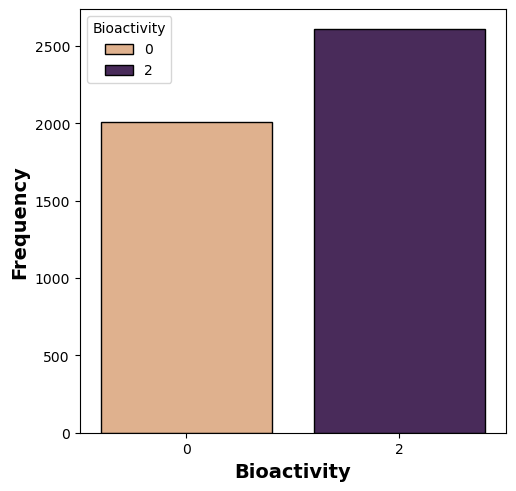

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
#sns.color_palette("flare")
sns.countplot(x='Bioactivity', hue = 'Bioactivity', data=df_visu, edgecolor='black', palette = "flare")

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

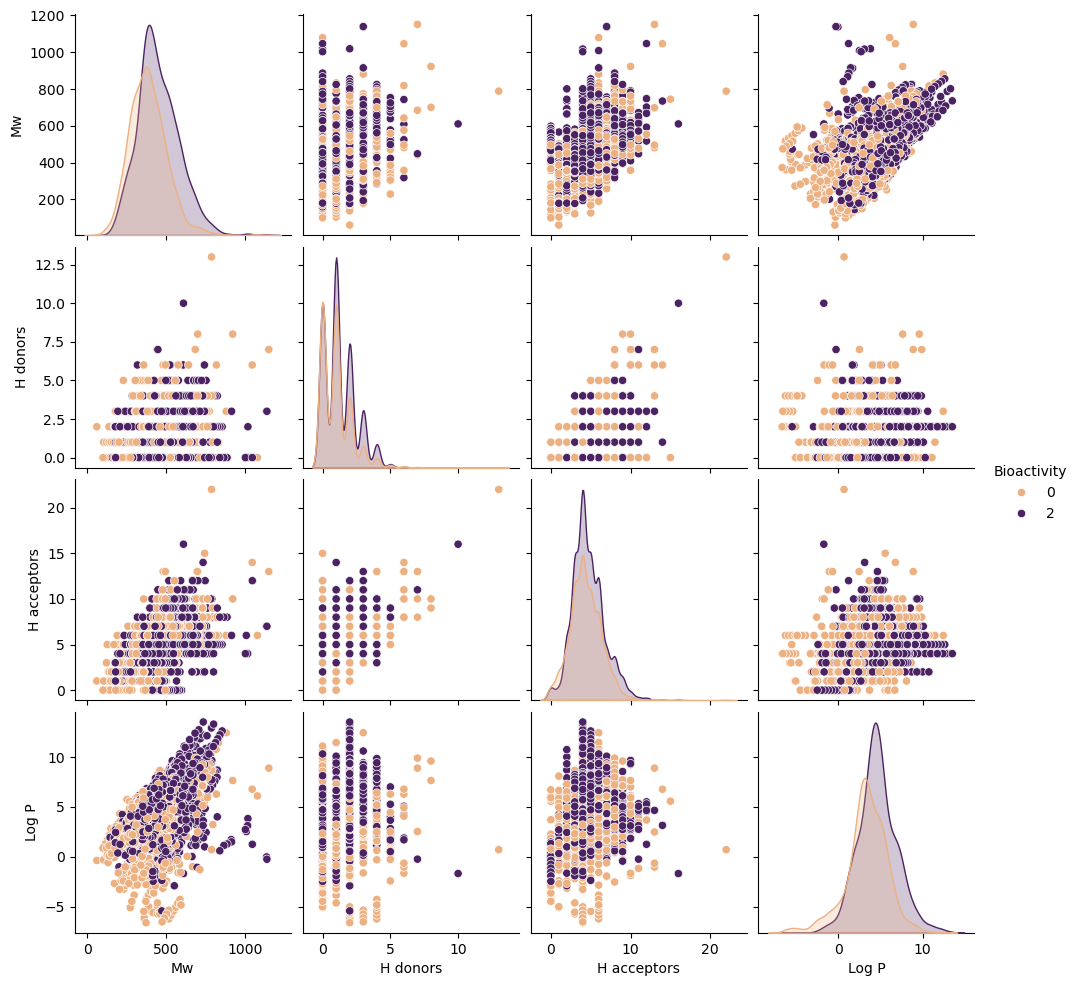

In [14]:
descriptors = ['Mw', 'H donors', 'H acceptors', 'Log P']
sns.pairplot(df_visu[descriptors + ['Bioactivity']], hue="Bioactivity", palette = "flare")

The data are clearly overlapping 

Lets increase the number of descriptor with rdkit:

In [15]:
def descriptors(smiles):
    mols = []

    for i in smiles:
        molec = Chem.MolFromSmiles(i)
        mols.append(molec)
    descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
    df_descr = pd.DataFrame(descrs)

    return df_descr
    

df_descr = descriptors(df_lipinski_pIC50.canonical_smiles)
df_descr = pd.concat([df_descr, df_lipinski_pIC50[['pIC50']]], axis=1)

# Let's replace infinities with NaN and then drop rows with any NaN values
df_descr.replace([np.inf, -np.inf], np.nan, inplace=True)
df_descr.dropna(inplace=True)

# Reset the index
df_descr.reset_index(drop=True, inplace=True)

df_descr 

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,11.818917,11.818917,0.048049,-0.603093,0.699960,10.478261,312.325,296.197,312.111007,118,...,0,0,0,0,0,0,0,0,0,6.124939
1,12.931567,12.931567,0.050268,-0.050268,0.734047,17.720000,376.913,355.745,376.112460,132,...,0,0,0,0,0,0,0,0,0,7.000000
2,12.859892,12.859892,0.135327,-4.406486,0.527034,11.464286,426.851,412.739,426.052894,146,...,0,0,0,0,0,0,0,0,0,4.301030
3,12.714518,12.714518,0.066807,-4.365026,0.695219,15.307692,404.845,388.717,404.068544,140,...,0,0,0,0,0,0,0,0,0,6.522879
4,12.136256,12.136256,0.238990,-4.744549,0.799502,11.391304,346.334,333.230,346.071131,124,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,12.330480,12.330480,0.008280,-4.062463,0.791052,16.259259,390.461,368.285,390.124943,144,...,0,0,0,0,0,0,0,0,0,9.679854
6115,12.184303,12.184303,0.125522,-0.461220,0.835956,21.000000,352.478,324.254,352.215078,138,...,0,0,0,0,0,0,0,0,0,6.562249
6116,12.786482,12.786482,0.227969,-0.798629,0.801201,10.714286,287.246,277.166,287.059386,106,...,0,0,0,0,0,0,0,0,0,4.118045
6117,11.685062,11.685062,0.289126,-0.762583,0.802917,11.086957,311.337,294.201,311.115758,118,...,0,0,0,0,0,0,0,0,0,4.259637


lets choose the most relevent features:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    

In [17]:
"""
X = df_descr
X = selection.fit_transform(X)
Y = df_lipinski_pIC50['pIC50']
X.shape #we droped around 80 features
"""

"\nX = df_descr\nX = selection.fit_transform(X)\nY = df_lipinski_pIC50['pIC50']\nX.shape #we droped around 80 features\n"

In [18]:
""""
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train) #not sur about the scaling but i always use to do it to give the same importance to the features
"""

'"\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)\nscaler = preprocessing.StandardScaler().fit(X_train)\nX_scaled = scaler.transform(X_train) #not sur about the scaling but i always use to do it to give the same importance to the features\n'

Now lets test out some models
We must always use 'scaler.transform(X_train)' on the 'X_test'
R/: Lets not that as we have a lot of features, the methods using 'distance' as KNN suffer from the high dimension curse

In [19]:
"""
Dimenstionnality curse = k nearest neighbor pas utiliser 
varier hyper paramètre 
sklearn logistic regression hyper scikit learn hyperparameters changes 
"""


'\nDimenstionnality curse = k nearest neighbor pas utiliser \nvarier hyper paramètre \nsklearn logistic regression hyper scikit learn hyperparameters changes \n'

# 2. Model Building 

## 2.1 Data preparation

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))


The X, Y variable matrixes are created and we look to fit_transform the X set
We see that 80 features have been dropped 

In [21]:
#remove the pIC50 column
X = df_descr.drop('pIC50', axis=1)
X1 = X

X = selection.fit_transform(X)
X_df = pd.DataFrame(X)

Y = df_descr['pIC50']


X1.shape, X_df.shape, Y.shape



((6119, 210), (6119, 130), (6119,))

It seems that the Y matrix has inf values that we need to replace before splitting

In [22]:
"""
# Replace infinities with NaN
Y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Let's get rid of NaN values (former infinities)
Y.dropna(inplace=True)

# We also need to drop the same rows from X_train_aligned
X_aligned = X_df.loc[Y.index]

X_aligned.shape, Y.shape
"""

"\n# Replace infinities with NaN\nY.replace([np.inf, -np.inf], np.nan, inplace=True)\n\n# Let's get rid of NaN values (former infinities)\nY.dropna(inplace=True)\n\n# We also need to drop the same rows from X_train_aligned\nX_aligned = X_df.loc[Y.index]\n\nX_aligned.shape, Y.shape\n"

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y, test_size=0.2)

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape



((1224, 130), (1224,))

In [24]:
np.random.seed(100) 
#allows to fixate the model prediction performance (score) after first attempt 
#done by fixing the random number generation

## 2.2 RandomForest Model

### 2.2.1 Model Contruction

In [25]:

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, Y_train)

Y_pred = model_rf.predict(X_test)

# Returns the R^2 value of the regression
r2_rf = model_rf.score(X_test, Y_test)
print(f"The score test of the RandomForest Model is R^2 ={r2_rf}")

# Some other evaluation metrics
mse_rf = mean_squared_error(Y_test, Y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred)

# Cross-Validation
cv_scores_rf = cross_val_score(model_rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_rf)}")

explained_variance_rf = explained_variance_score(Y_test, Y_pred)

print(f"The metrics calculated for the RF model are MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, R^2: {r2_rf}, Explained Variance: {explained_variance_rf}")




The score test of the RandomForest Model is R^2 =0.7121741751423267
Cross-Validation MSE: 0.8090608868096639
The metrics calculated for the RF model are MSE: 0.7313679138797333, RMSE: 0.8552005109211134, MAE: 0.6053763881311301, R^2: 0.7121741751423267, Explained Variance: 0.7125344796011055


### 2.2.2 Hyper paramter tuning
### Let's try to tune the hyper paramters of the model with RandomizedSearch - This will take a moment 

In [65]:
from sklearn.model_selection import RandomizedSearchCV

# We define here the parameter distribution
param_distributions = {
    'n_estimators': [10, 30, 50, 100, 150],
    'max_depth': [None, 2, 16, 32],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model_rf2 = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_rf2, param_distributions=param_distributions, n_iter=25, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit the model
random_search.fit(X_train, Y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 16}
Best score: -0.8163372877308337


Let's create a new model with tuned hyper parameters

In [66]:
# Best parameters found from RandomizedSearchCV
opt_params = {
    'n_estimators': 100,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_depth': 16  
}


model_rf2 = RandomForestRegressor(**opt_params, random_state=42)

# Assuming X_train and Y_train are your training data and labels
model_rf2.fit(X_train, Y_train)

Y_pred_2 = model_rf.predict(X_test)


# Returns the R^2 value of the regression
r2_rf2 = model_rf2.score(X_test, Y_test)
print(f"The score test of the optimized RandomForest Model is R^2 ={r2_rf2}")

# Some other evaluation metrics
mse_rf2 = mean_squared_error(Y_test, Y_pred_2)
rmse_rf2 = np.sqrt(mse_rf2)
mae_rf2 = mean_absolute_error(Y_test, Y_pred_2)

# Cross-Validation
cv_scores_rf2 = cross_val_score(model_rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_rf2)}")

explained_variance_rf2 = explained_variance_score(Y_test, Y_pred_2)

print(f"The metrics calculated for the RF model are MSE: {mse_rf2}, RMSE: {rmse_rf2}, MAE: {mae_rf2}, R^2: {r2_rf2}, Explained Variance: {explained_variance_rf2}")





The score test of the optimized RandomForest Model is R^2 =0.7130672915860801
Cross-Validation MSE: 0.8149946903649659
The metrics calculated for the RF model are MSE: 0.7229700067565805, RMSE: 0.850276429613676, MAE: 0.6079348051279896, R^2: 0.7130672915860801, Explained Variance: 0.7158689844782509


Let's try to compare if the new model has better performances 

In [67]:
metrics1 = {'MSE' : mse_rf, 'RMSE' : rmse_rf, 'MAE' : mae_rf, 'R^2' : r2_rf, 'explained_variance' : explained_variance_rf}
metrics2 = {'MSE' : mse_rf2, 'RMSE' : rmse_rf2, 'MAE' : mae_rf2, 'R^2' : r2_rf2, 'explained_variance' : explained_variance_rf2}

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")




MSE decreased by 0.008397907123152804 (or 1.15%) from 0.7313679138797333 to 0.7229700067565805
RMSE decreased by 0.004924081307437378 (or 0.58%) from 0.8552005109211134 to 0.850276429613676
MAE increased by 0.002558416996859436 (or 0.42%) from 0.6053763881311301 to 0.6079348051279896
R^2 increased by 0.000893116443753339 (or 0.13%) from 0.7121741751423267 to 0.7130672915860801
explained_variance increased by 0.0033345048771453722 (or 0.47%) from 0.7125344796011055 to 0.7158689844782509


### 2.2.3 Performance Visualisation

/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


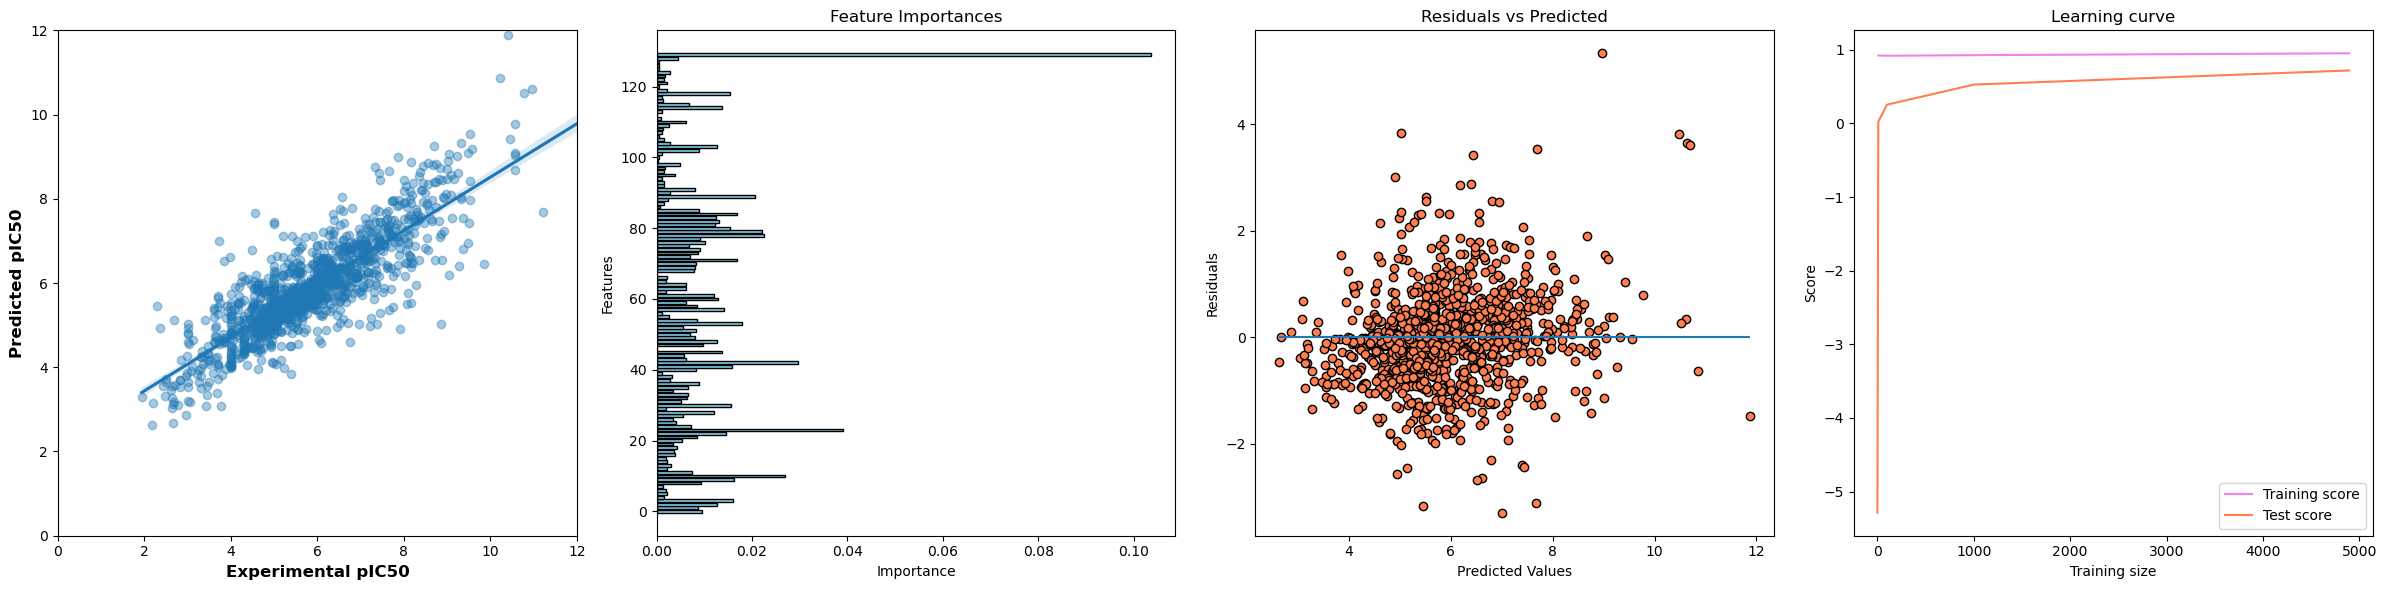

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_rf.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred
axs[2].scatter(Y_pred, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_rf.fit(X_slice, y_slice)
    train_scores.append(model_rf.score(X_slice, y_slice))
    test_scores.append(model_rf.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()



/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


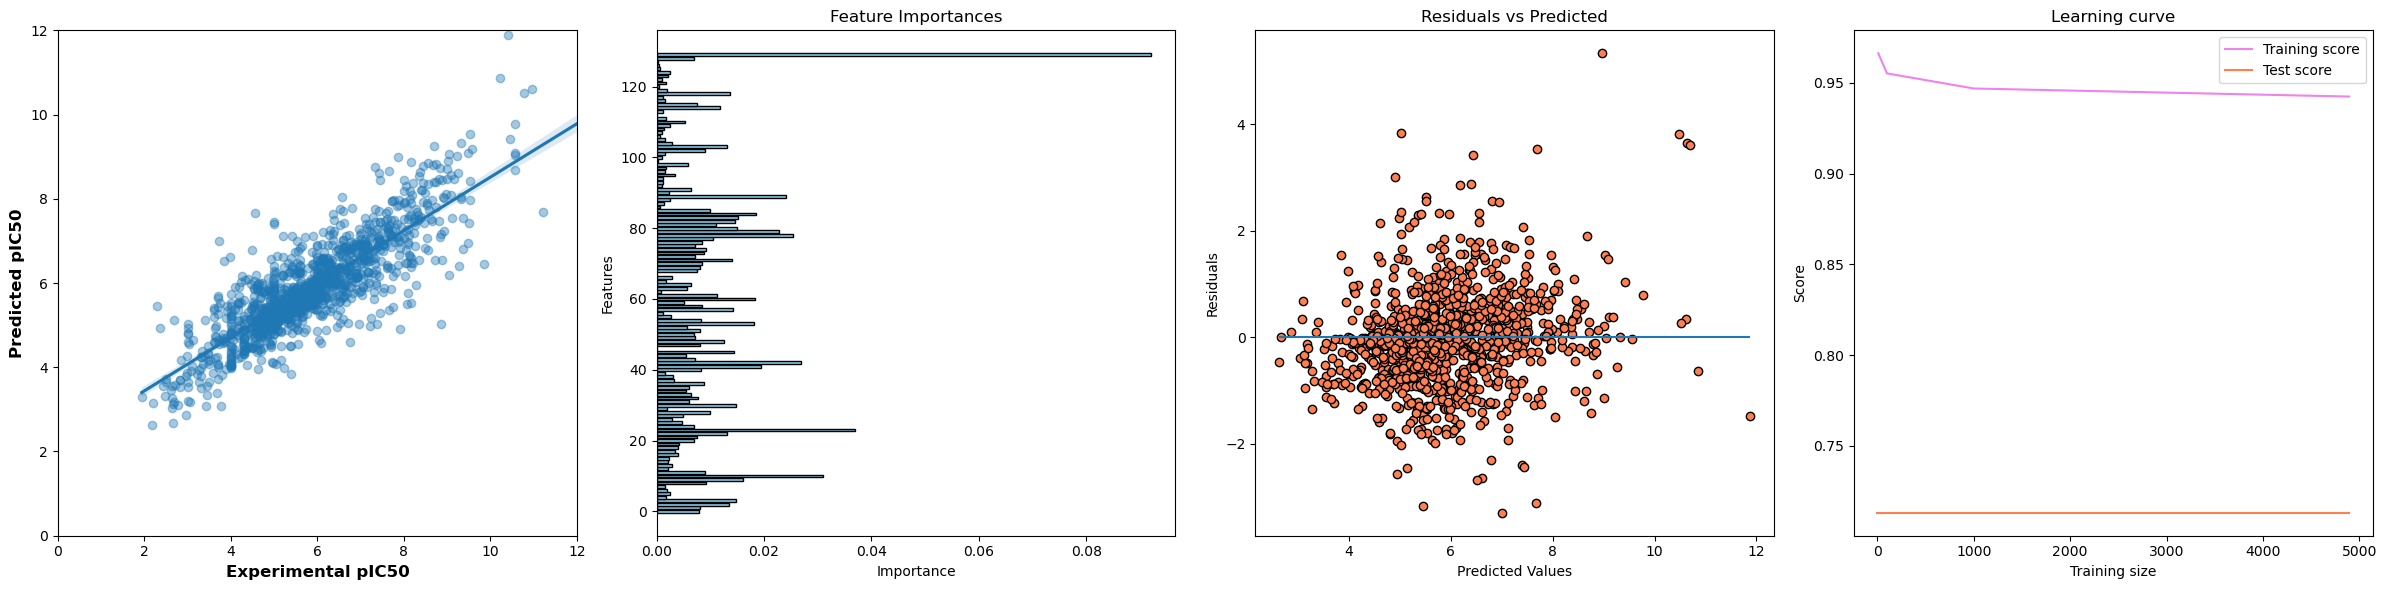

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred_2, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_rf.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred_2
axs[2].scatter(Y_pred_2, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred_2.min(), xmax=Y_pred_2.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_rf.fit(X_slice, y_slice)
    train_scores.append(model_rf2.score(X_slice, y_slice))
    test_scores.append(model_rf2.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()




## 2.3 Gradient Boosting Machines (GBMs)

### 2.3.1 Model Construction 

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape

model_gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)

model_gbm.fit(X_train, Y_train)

Y_pred_gbm = model_gbm.predict(X_test)

# Returns the R^2 value of the regression
r2_gbm = model_gbm.score(X_test, Y_test)
print(f"The score test of the Gradient Boosting Machines is R^2 ={r2_gbm}")


# Some other evaluation metrics
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
mae_gbm = mean_absolute_error(Y_test, Y_pred_gbm)

# Cross-Validation
cv_scores_gbm = cross_val_score(model_gbm, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_gbm)}")

explained_variance_gbm = explained_variance_score(Y_test, Y_pred_gbm)

print(f"The metrics calculated for the RF model are MSE: {mse_gbm}, RMSE: {rmse_gbm}, MAE: {mae_gbm}, R^2: {r2_gbm}, Explained Variance: {explained_variance_gbm}")




The score test of the Gradient Boosting Machines is R^2 =0.5674193348369618
Cross-Validation MSE: 1.1062934500424915
The metrics calculated for the RF model are MSE: 1.0991912168459623, RMSE: 1.0484232050302789, MAE: 0.8015099555431361, R^2: 0.5674193348369618, Explained Variance: 0.567623615091982


### 2.3.3 Hyper parameter tuning 

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [34]:
param_dist = {
    "n_estimators": sp_randint(100, 300),  
    "learning_rate": uniform(0.01, 0.1),  
    "max_depth": sp_randint(3, 5),  
    "min_samples_split": sp_randint(2, 6),
    "min_samples_leaf": sp_randint(1, 4),
    "subsample": uniform(0.7, 0.3)  
}

# Initialize the base model
model_gbm2 = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model_gbm2, param_distributions=param_dist,
                                   n_iter=10, cv=3, random_state=42, scoring='neg_mean_squared_error')

random_search.fit(X_train, Y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

#best_gbm = random_search.best_estimator_

Best parameters found:  {'learning_rate': 0.10385527090157502, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157, 'subsample': 0.8574269294896713}
Best score found:  -0.9173158044256154


In [35]:
best_params = {
    'learning_rate': 0.10385527090157502,
    'max_depth': 4,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 157,
    'subsample': 0.8574269294896713
}

model_gbm2 = GradientBoostingRegressor(**best_params, random_state=42)

model_gbm2.fit(X_train, Y_train)

Y_pred_gbm2 = model_gbm2.predict(X_test)

# Returns the R^2 value of the regression
r2_gbm2 = model_gbm2.score(X_test, Y_test)
print(f"The score test of the Gradient Boosting Machines is R^2 ={r2_gbm2}")


# Some other evaluation metrics
mse_gbm2 = mean_squared_error(Y_test, Y_pred_gbm2)
rmse_gbm2 = np.sqrt(mse_gbm2)
mae_gbm2 = mean_absolute_error(Y_test, Y_pred_gbm2)

# Cross-Validation
cv_scores_gbm2 = cross_val_score(model_gbm2, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_gbm2)}")

explained_variance_gbm2 = explained_variance_score(Y_test, Y_pred_gbm2)

print(f"The metrics calculated for the RF model are MSE: {mse_gbm2}, RMSE: {rmse_gbm2}, MAE: {mae_gbm2}, R^2: {r2_gbm2}, Explained Variance: {explained_variance_gbm2}")


The score test of the Gradient Boosting Machines is R^2 =0.6816442443942068
Cross-Validation MSE: 0.8634667321699668
The metrics calculated for the RF model are MSE: 0.8089447323364735, RMSE: 0.8994135491176867, MAE: 0.6704774496704631, R^2: 0.6816442443942068, Explained Variance: 0.6816758116314674


Performance change in % after tuning the hyperparameters 


In [36]:
metrics1 = {'MSE' : mse_gbm, 'RMSE' : rmse_gbm, 'MAE' : mae_gbm, 'R^2' : r2_gbm, 'explained_variance' : explained_variance_gbm}
metrics2 = {'MSE' : mse_gbm2, 'RMSE' : rmse_gbm2, 'MAE' : mae_gbm2, 'R^2' : r2_gbm2, 'explained_variance' : explained_variance_gbm2}

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")


MSE decreased by 0.29024648450948887 (or 26.41%) from 1.0991912168459623 to 0.8089447323364735
RMSE decreased by 0.1490096559125922 (or 14.21%) from 1.0484232050302789 to 0.8994135491176867
MAE decreased by 0.131032505872673 (or 16.35%) from 0.8015099555431361 to 0.6704774496704631
R^2 increased by 0.11422490955724496 (or 20.13%) from 0.5674193348369618 to 0.6816442443942068
explained_variance increased by 0.1140521965394854 (or 20.09%) from 0.567623615091982 to 0.6816758116314674


### 2.3.2 Performance Visualisation 



/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


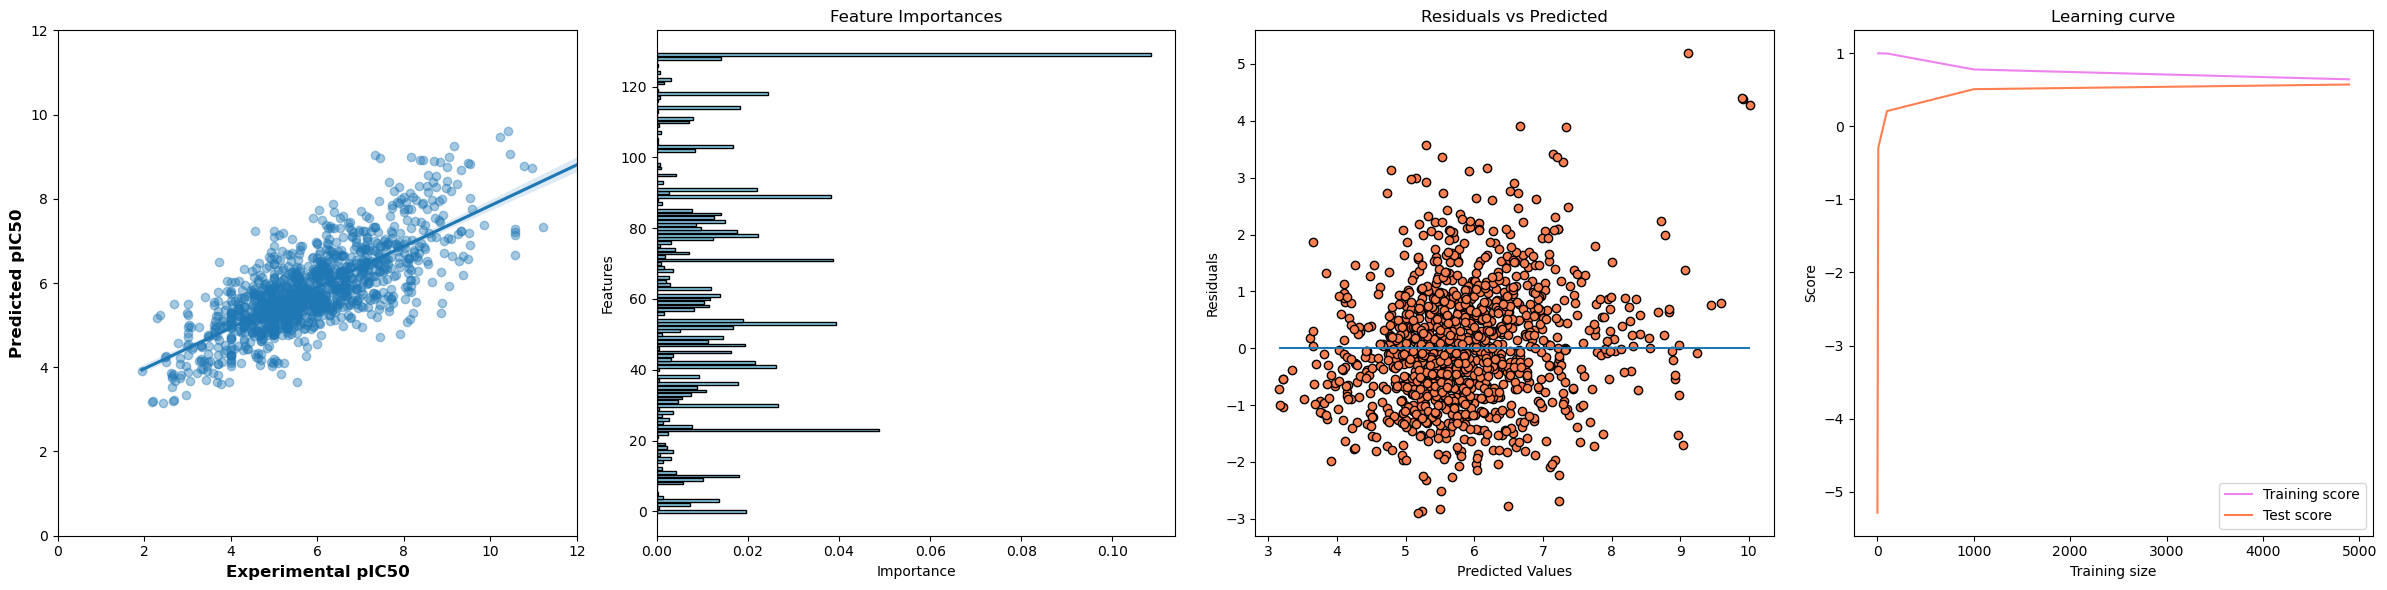

In [37]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred_gbm, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_gbm.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred_gbm
axs[2].scatter(Y_pred_gbm, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred_gbm.min(), xmax=Y_pred_gbm.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_gbm.fit(X_slice, y_slice)
    train_scores.append(model_gbm.score(X_slice, y_slice))
    test_scores.append(model_gbm.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()




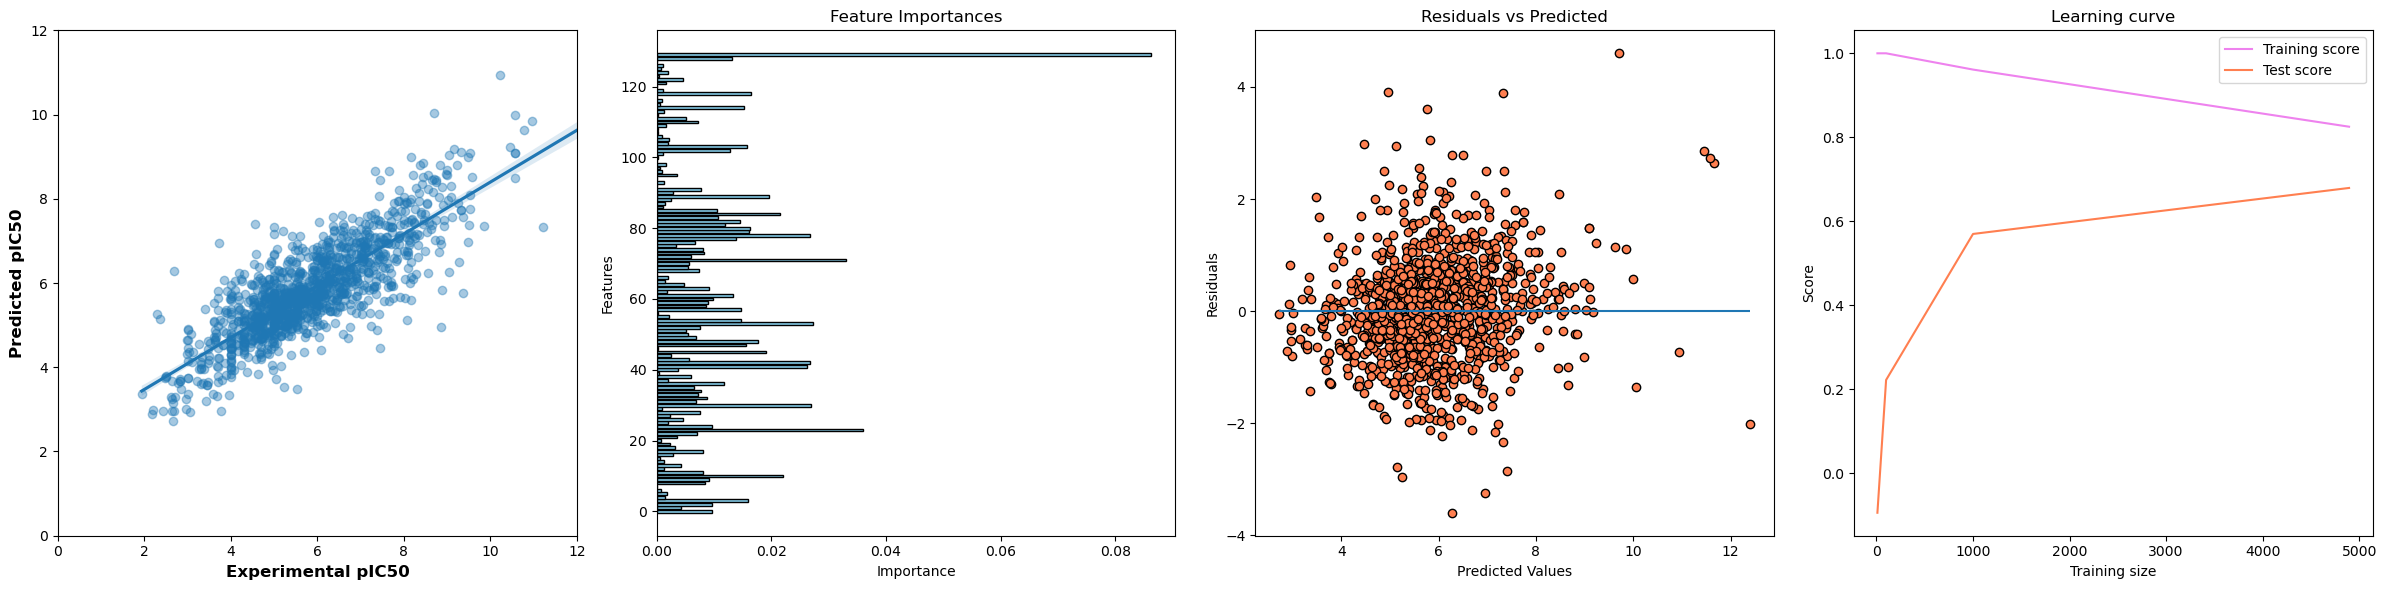

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred_gbm2, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

model_gbm2.fit(X_train, Y_train)

# Plot 2: Feature Importances
feature_importances = model_gbm2.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred_gbm2
axs[2].scatter(Y_pred_gbm2, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred_gbm2.min(), xmax=Y_pred_gbm2.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [10, 100, 1000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_gbm2.fit(X_slice, y_slice)
    train_scores.append(model_gbm2.score(X_slice, y_slice))
    test_scores.append(model_gbm2.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()



## 2.4 Fully Connected (Dense) Neural Network

In [39]:
!pip install tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler


### 2.4.1 Model Contruction

In [40]:
# The NN cannot fit in the case of excessive values, let's apply a scaling function
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This will get the number of features / descriptors in the dataset 
num_features = X_train_scaled.shape[1]  

model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer for regression
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')


history = model_nn.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, Y_test))






Epoch 1/100


/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 11.8288 - val_loss: 2.2335
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 2.9020 - val_loss: 1.7431
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 2.2543 - val_loss: 1.7040
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 2.0789 - val_loss: 1.5262
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 2.0879 - val_loss: 1.5018
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 1.8263 - val_loss: 1.4618
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 1.8335 - val_loss: 1.3178
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 1.7529 - val_loss: 1.2845
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 1.7158 - val_loss: 1.4011
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 1.5791 - val_loss: 1.2526
Epoch 11/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 1.5842 - val_loss: 1.2038
Epoch 12/100
153/153 ━━━━━━━━━

Let's try to find the validation loss on the NN model

In [41]:
val_loss = model_nn.evaluate(X_test_scaled, Y_test)
print(f"Validation loss: {val_loss}")

Y_pred_nn = model_nn.predict(X_test_scaled)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - loss: 0.7821
Validation loss: 0.80153888463974
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


Let's evalute the performances with other metrics 

In [42]:
mse_nn = mean_squared_error(Y_test, Y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(Y_test, Y_pred_nn)
r2_nn = r2_score(Y_test, Y_pred_nn)
explained_variance_nn = explained_variance_score(Y_test, Y_pred_nn)


print(f"The metrics calculated for the NN model are MSE: {mse_nn}, RMSE: {rmse_nn}, MAE: {mae_nn}, R^2: {r2_nn}, Explained Variance: {explained_variance_nn}")


The metrics calculated for the NN model are MSE: 0.7976272791003559, RMSE: 0.8930998147465691, MAE: 0.6550453333023372, R^2: 0.6860981659447075, Explained Variance: 0.6879313185251756


### 2.4.2 Hyper parameter tuning

In [43]:
!pip install keras-tuner
import keras_tuner as kt


In [44]:
# This function will take hyperparameters as input and outputs a model

def create_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, default=0.2, step=0.1)))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    
    return model

In [45]:
# Let's use on of the function on the keras-tuner package to find the optimal hyper parameters with RandomSearch tool
tuner = kt.RandomSearch(create_model,
                        objective='val_mean_squared_error',
                        max_trials=10,  # Number of trials to run
                        executions_per_trial=1,  # Number of models to train for each trial
                        directory='my_dir',  # Directory to store logs
                        project_name='keras_tuner_demo')

tuner.search(X_train_scaled, Y_train, epochs=10, validation_split=0.1)

Reloading Tuner from my_dir/keras_tuner_demo/tuner0.json


In [46]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hp
model_nn2 = tuner.hypermodel.build(best_hps)

# Train the best model
history = model_nn2.fit(X_train_scaled, Y_train, epochs=50, validation_split=0.1)

Y_pred_nn2 = model_nn2.predict(X_test_scaled)

# Evaluate on test data
val_loss2 = model_nn2.evaluate(X_test_scaled, Y_test)
print(f"Validation loss: {val_loss2}")

mse_nn2 = mean_squared_error(Y_test, Y_pred_nn2)
rmse_nn2 = np.sqrt(mse_nn2)
mae_nn2 = mean_absolute_error(Y_test, Y_pred_nn2)
r2_nn2 = r2_score(Y_test, Y_pred_nn2)
explained_variance_nn2 = explained_variance_score(Y_test, Y_pred_nn2)


print(f"The metrics calculated for the NN model are MSE: {mse_nn2}, RMSE: {rmse_nn2}, MAE: {mae_nn2}, R^2: {r2_nn2}, Explained Variance: {explained_variance_nn2}")


Epoch 1/50
  1/138 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - loss: 44.4238 - mean_squared_error: 44.4238

/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 6.6699 - mean_squared_error: 6.6699 - val_loss: 2.8049 - val_mean_squared_error: 2.8635
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 2.1670 - mean_squared_error: 2.1669 - val_loss: 2.4189 - val_mean_squared_error: 2.4401
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 1.6558 - mean_squared_error: 1.6558 - val_loss: 2.7336 - val_mean_squared_error: 2.7841
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 1.5341 - mean_squared_error: 1.5341 - val_loss: 1.8351 - val_mean_squared_error: 1.8662
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 1.3108 - mean_squared_error: 1.3108 - val_loss: 1.6442 - val_mean_squared_error: 1.6685
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 1.1749 - mean_squared_error: 1.1748 - val_loss: 2.0995 - val_mean_squared_error: 2.1321
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 1.0389 - mean_squared_error: 1.0389 - val_loss: 1

In [47]:
metrics1 = {'MSE' : mse_nn, 'RMSE' : rmse_nn, 'MAE' : mae_nn, 'R^2' : r2_nn, 'explained_variance' : explained_variance_nn }
metrics2 = {'MSE' : mse_nn2, 'RMSE' : rmse_nn2, 'MAE' : mae_nn2, 'R^2' : r2_nn2, 'explained_variance' : explained_variance_nn2 }

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")

print(f"Also validation losses went from {val_loss} to {val_loss2}")

MSE decreased by 0.01329132409790068 (or 1.67%) from 0.7976272791003559 to 0.7843359550024552
RMSE decreased by 0.007472378968715998 (or 0.84%) from 0.8930998147465691 to 0.8856274357778531
MAE decreased by 0.021678777198376853 (or 3.31%) from 0.6550453333023372 to 0.6333665561039603
R^2 increased by 0.005230727585019523 (or 0.76%) from 0.6860981659447075 to 0.691328893529727
explained_variance increased by 0.0036443725105159697 (or 0.53%) from 0.6879313185251756 to 0.6915756910356916
Also validation losses went from 0.80153888463974 to [0.7801539897918701, 0.7843359112739563]
